In [1]:
import dataretrieval.nwis as nwis

# Source of data https://github.com/DOI-USGS/dataRetrieval?tab=readme-ov-file

In [2]:
# specify the USGS site code for which we want data.
site1 = '01104715' # Charles River, New Charles River Dam at Boston, MA 
site2 = '01104705' # Charles River at First St. At Cambridge, MA 

In [3]:
# get instantaneous values (iv)
df_site1 = nwis.get_record(sites=site1, service='iv', start='2008-05-06', end='2024-03-31')
df_site2 = nwis.get_record(sites=site2, service='iv', start='2007-10-01', end='2024-03-31')

#df_site2 = nwis.get_record(sites=site2, service='iv', start='2023-01-01', end='2023-12-31')

# get water quality samples (qwdata)
#df2 = nwis.get_record(sites=site, service='qwdata', start='2017-12-31', end='2018-01-01')

# get basic info about the site
#df3 = nwis.get_record(sites=site, service='site')


In [4]:
print(df_site2.iloc[2])

00065         107.55
00065_cd           A
site_no     01104705
Name: 2007-10-01 05:30:00+00:00, dtype: object


In [5]:
df1 = df_site1["00065"]
df2 = df_site2["00065"]

<Axes: xlabel='datetime'>

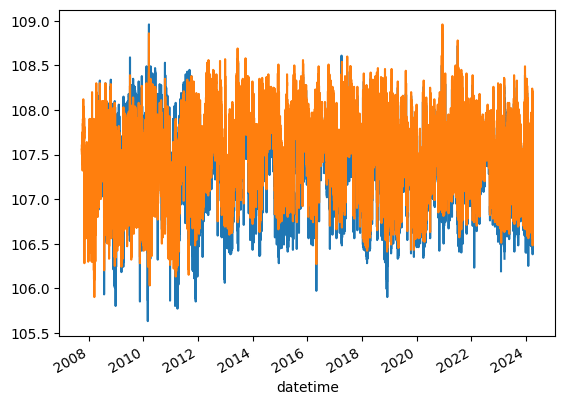

In [6]:
df1.plot()
df2.plot()

In [10]:
import numpy as np 
print(np.nanmax(df1))
print(np.nanmax(df2))
print(np.argmax(df1))

108.96
108.96
63707


In [16]:
print(np.shape(df1))

(682045,)


In [13]:
print(df_site1.iloc[63707])

00065                    108.96
00065_cd                      A
site_no                01104715
62623_tide stage            NaN
62623_tide stage_cd         NaN
Name: 2010-03-15 12:45:00+00:00, dtype: object


In [14]:
index_2=(np.argmax(df2))
print(df_site2.iloc[index_2])

00065         108.96
00065_cd           A
site_no     01104705
Name: 2020-12-10 12:30:00+00:00, dtype: object


<Axes: xlabel='datetime'>

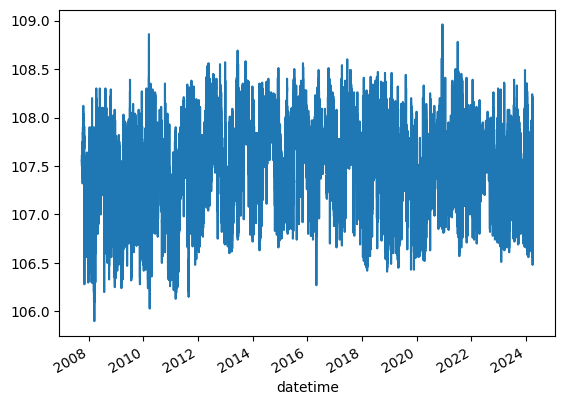

In [15]:
df2.plot()

In [ ]:
import numpy as np
#df1_mean=np.nanmean(df1)-105.62+3.5 # 4715 is Dam 
df1_mean = np.nanmean(df1) - 106.64-0.05 
df2_mean = np.nanmean(df2)-106.68
print(df1_mean)
print(df2_mean)

In [ ]:
print(type(df2))

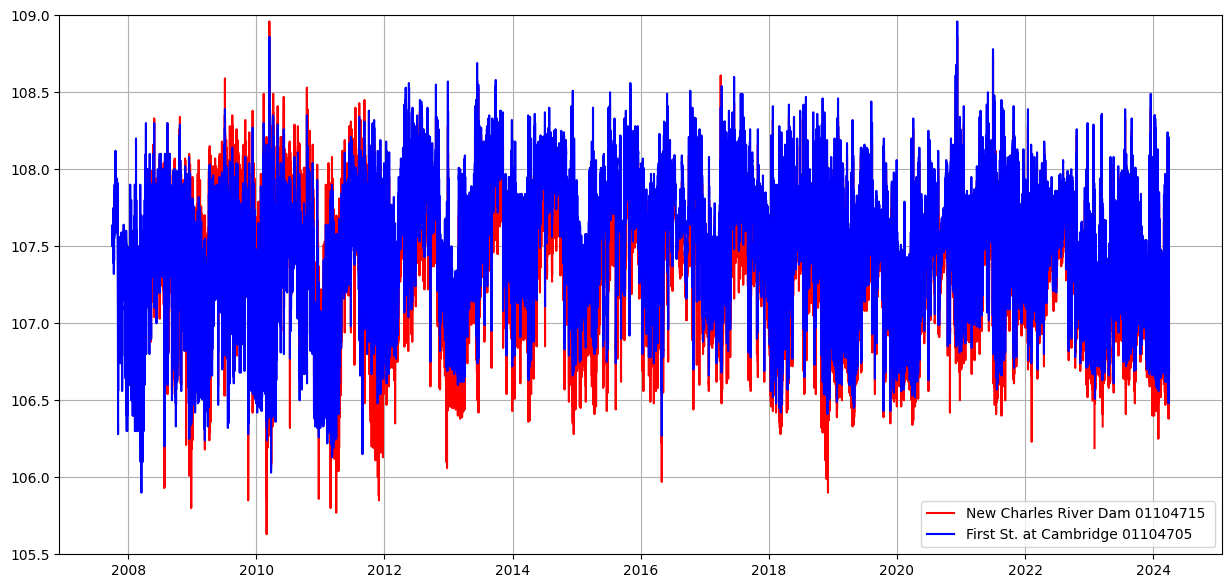

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 7))
plt.plot(df1, label = 'New Charles River Dam 01104715 ', color='r')
#plt.text(df1, 60, 'Parabola $Y = x^2$', fontsize = 22)

plt.plot(df2, label = 'First St. at Cambridge 01104705', color='b')
plt.ylim(105.5, 109)
plt.grid()
plt.legend()
plt.savefig("stations_waterlevel_all_years.png")

In [29]:
print(df_site1.resample('M')['00065'].max())

datetime
2008-05-31 00:00:00+00:00    108.33
2008-06-30 00:00:00+00:00    108.07
2008-07-31 00:00:00+00:00    108.10
2008-08-31 00:00:00+00:00    108.30
2008-09-30 00:00:00+00:00    108.07
                              ...  
2023-12-31 00:00:00+00:00    108.39
2024-01-31 00:00:00+00:00    108.29
2024-02-29 00:00:00+00:00    107.78
2024-03-31 00:00:00+00:00    108.17
2024-04-30 00:00:00+00:00    107.39
Freq: M, Name: 00065, Length: 192, dtype: float64


In [38]:
from scipy.stats import genextreme as gev 
monthly_data=df_site1.resample('M')['00065'].max()
shape, loc, scale = gev.fit(monthly_data)
return_periods = np.array([100,500])
return_levels = gev.isf(1/return_periods, shape, loc, scale)
print(return_levels)

[108.74425813 108.85529266]


In [39]:
from scipy.stats import genextreme as gev 
monthly_data=df_site2.resample('M')['00065'].max()
shape, loc, scale = gev.fit(monthly_data)
return_periods = np.array([100,500])
return_levels = gev.isf(1/return_periods, shape, loc, scale)
print(return_levels)

[108.78140092 108.88196663]


[108.74425813 108.85529266]


In [35]:
model = gev(monthly_data)
# return 100 year
print(model)
#return_level_100yr=model.quantile(1- 1/100)

In [26]:
from extremes import gev, GEV


ModuleNotFoundError: No module named 'extremes'

In [25]:
# calculate 100 year extreme values
# Assuming daily data, convert 'date' to year
df['year'] = df_site1['datetime'].year

#extreme_100 = df1.rolling(window='100Y').max()

# calculate 500 year extreme values
#extreme_500 = df1.rolling(window='500Y').max()

# print the results
#print("100 year extreme values:")
#print(extreme_100)
#print("500 year extreme values:")
#print(extreme_500)

KeyError: 'datetime'

In [ ]:
#import pandas as pd
#df11=pd.DataFrame()
#df11=df1
#df11.to_csv('outfile_nwis_site1_01104715.csv')

#df12=pd.DataFrame()
#df12=df2
#df12.to_csv('outfile_nwis_site2_01104705.csv')

In [ ]:
df1_usgs.plot()
df2_usgs.plot()